### Import things

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./CSVs/all_clean.csv')

### I'm going to drop the book Passenger to Frankfurt for now because the authors had identified it as an outlier and also dropped it for during their analysis for the following reasons:
>A linear regression on the decline in vocabulary with age approaches significance [F(1,14) =4
3.95, p = .066], and is highly significant when the outlier, Frankfurt, is removed (see discussion below) [F(1,13) = 9.80, p < .01]

>Outlier. Passenger to Frankfurt has the largest vocabulary of all the works we analyzed.
Unlike Christie’s other works, it is a thriller, not a detective mystery, conceived, written,
and researched in her early to mid 70s. Subtitled “An extravaganza”, it draws on books
by political thinkers that she requested of her publishers. On receiving her manuscript,
they were doubtful about bringing it out because it differed so much from her detective
fiction. Much of the vocabulary in Passenger to Frankfurt comes from her reliance on
these sources. We therefore exclude it as an outlier from our tests for vocabulary richness. Nonetheless, we observe that it was not an outlier with regard to indefinite words.

In [3]:
df = df[df['book_title'].str.lower() != 'passenger to frankfurt'].reset_index(drop=True)

### I'm also going to drop the autobiography for now because this book is different:

The autobiography was written over the course of 15 years, and she didn't really edit it. However, the publishers admitted to cleaning up the text.

source: https://en.wikipedia.org/wiki/Agatha_Christie:_An_Autobiography

### Look at correlations

<AxesSubplot:>

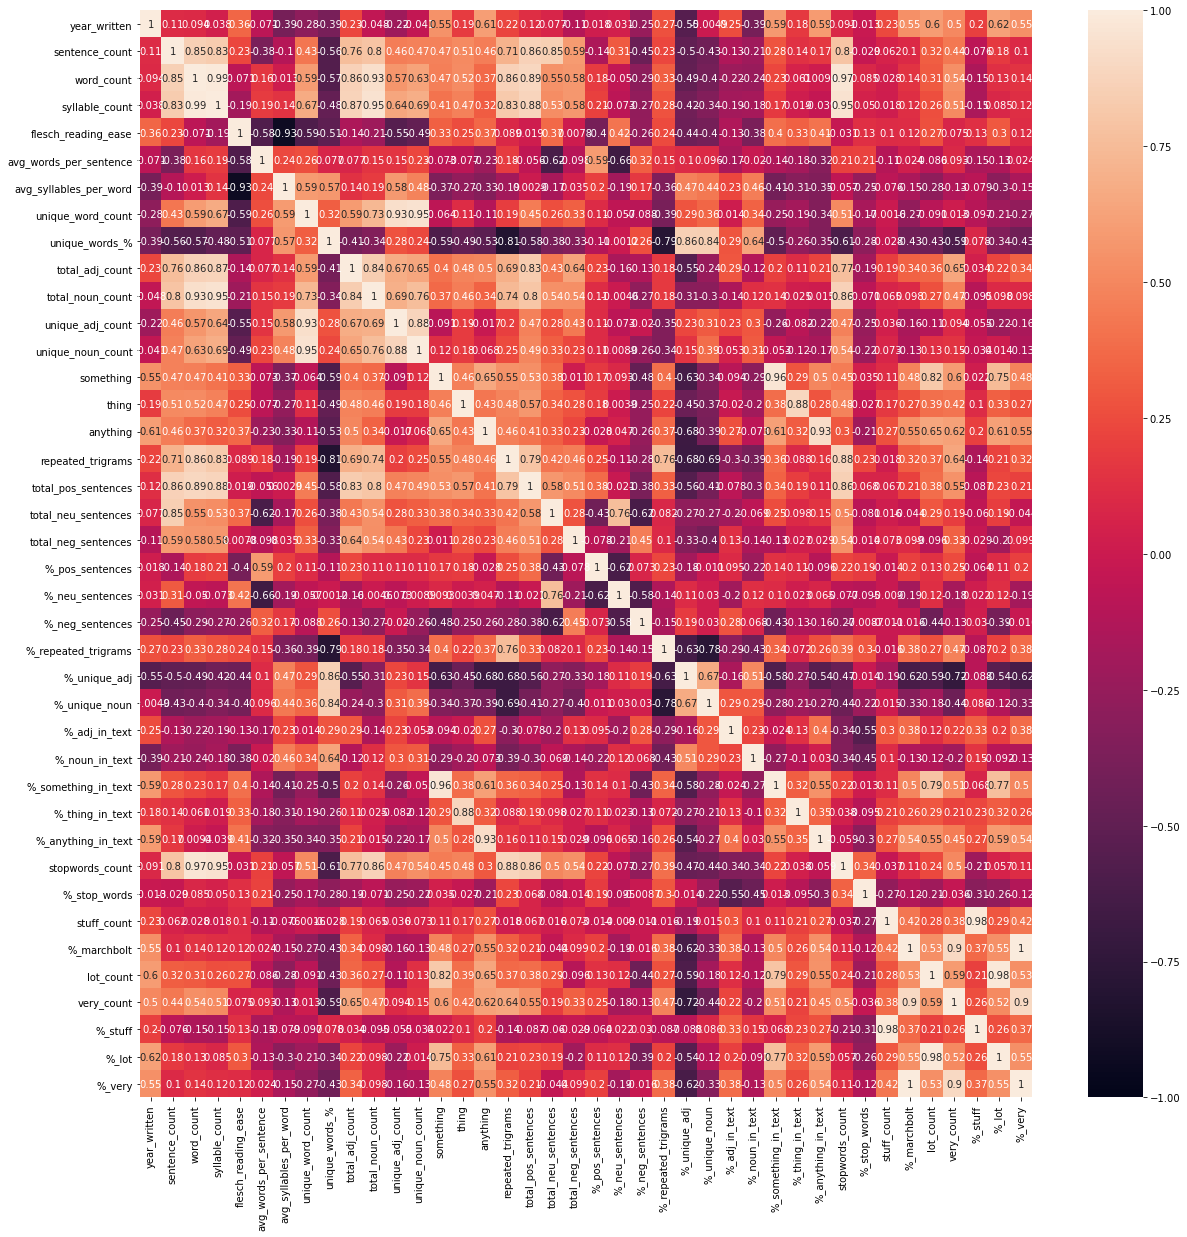

In [4]:
plt.figure(figsize=[20,20])
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

### Replicating the Lancashire & Hirst, 2009 paper

The authors found that the "richness" Christie's novels declined, repeated phrase types as measured by n-grams increased, and usage of indefinite words increased as she aged.

Text(0.5, 1.0, 'Word Count Over the Years')

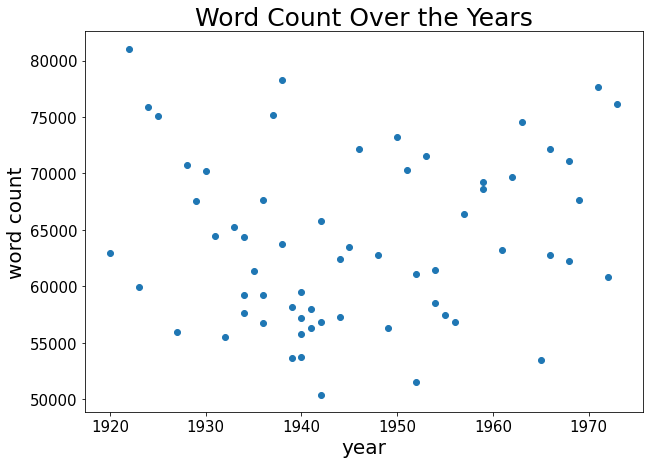

In [5]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_written'], df['word_count'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('year', size = 20)
plt.ylabel('word count', size = 20)
plt.title('Word Count Over the Years', size = 25)

Text(0.5, 1.0, 'Unique Word Count Over the Years')

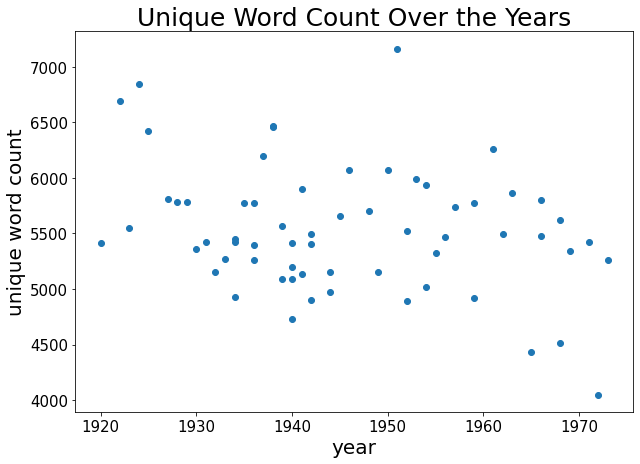

In [6]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_written'], df['unique_word_count'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('year', size = 20)
plt.ylabel('unique word count', size = 20)
plt.title('Unique Word Count Over the Years', size = 25)

Text(0.5, 1.0, "Frequency of the word 'Something' Over the Years")

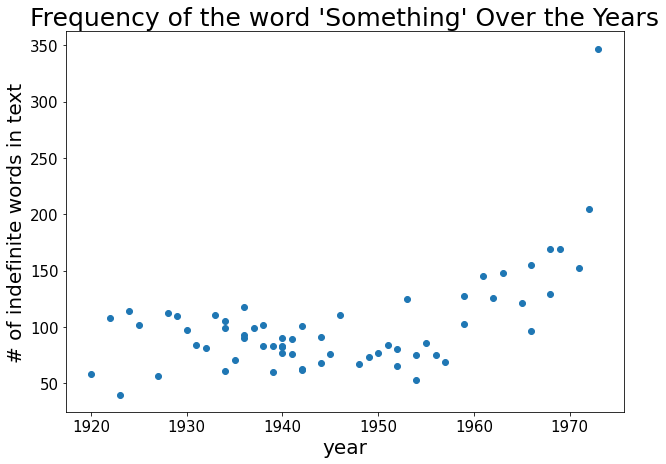

In [7]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_written'],df[['something']])
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Indefinite Word Usage Over Time')
plt.xlabel('year', size = 20)
plt.ylabel('# of indefinite words in text', size = 20)
plt.title('Frequency of the word \'Something\' Over the Years', size = 25)

Text(0.5, 1.0, "Frequency of the word 'Anything' Over the Years")

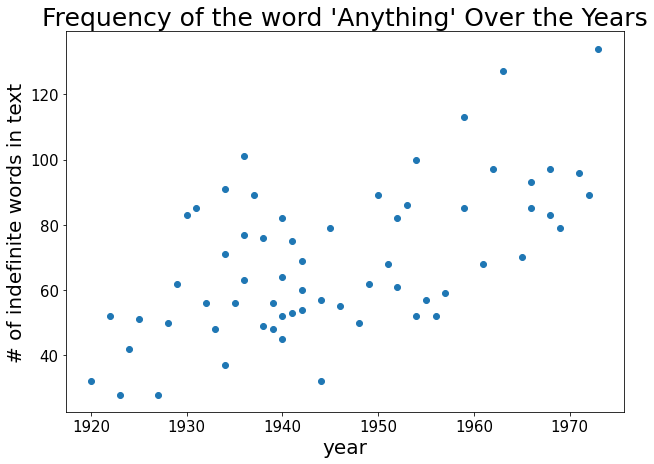

In [8]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_written'],df[['anything']])
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Indefinite Word Usage Over Time')
plt.xlabel('year', size = 20)
plt.ylabel('# of indefinite words in text', size = 20)
plt.title('Frequency of the word \'Anything\' Over the Years', size = 25)

Text(0.5, 1.0, "Frequency of the word 'Thing' Over the Years")

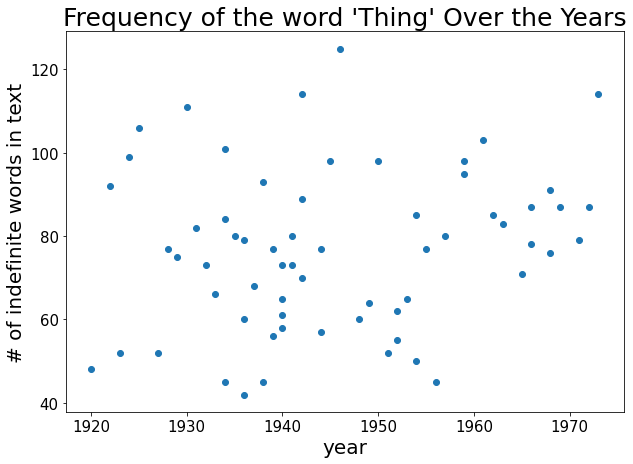

In [9]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_written'],df[['thing']])
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Indefinite Word Usage Over Time')
plt.xlabel('year', size = 20)
plt.ylabel('# of indefinite words in text', size = 20)
plt.title('Frequency of the word \'Thing\' Over the Years', size = 25)

Text(0, 0.5, 'Repeated Trigrams')

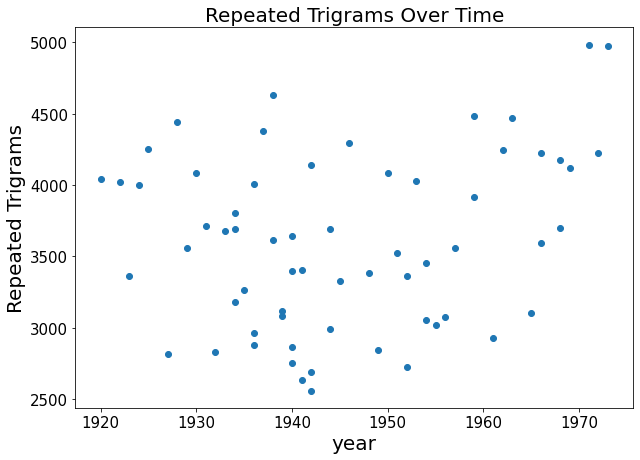

In [10]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_written'], df['repeated_trigrams'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Repeated Trigrams Over Time', size=20)
plt.xlabel('year', size = 20)
plt.ylabel('Repeated Trigrams', size = 20)

### Further analysis of her text

In [28]:
df.columns

Index(['book_title', 'book_text', 'copyright', 'year_written',
       'sentence_count', 'word_count', 'syllable_count', 'flesch_reading_ease',
       'avg_words_per_sentence', 'avg_syllables_per_word', 'stemmed_text',
       'unique_word_count', 'unique_words_%', 'total_adj_count',
       'total_noun_count', 'adj_word_list', 'noun_word_list',
       'unique_adj_count', 'unique_noun_count', 'something', 'thing',
       'anything', 'repeated_trigrams', 'total_pos_sentences',
       'total_neu_sentences', 'total_neg_sentences', '%_pos_sentences',
       '%_neu_sentences', '%_neg_sentences', '%_repeated_trigrams',
       '%_unique_adj', '%_unique_noun', '%_adj_in_text', '%_noun_in_text',
       '%_something_in_text', '%_thing_in_text', '%_anything_in_text',
       'stemmed_removed_stopwords', 'only_stopwords', 'stopwords_count',
       '%_stop_words', 'stuff_count', '%_marchbolt', 'lot_count', 'very_count',
       '%_stuff', '%_lot', '%_very'],
      dtype='object')

Text(0.5, 1.0, '% Stopwords Over the Years')

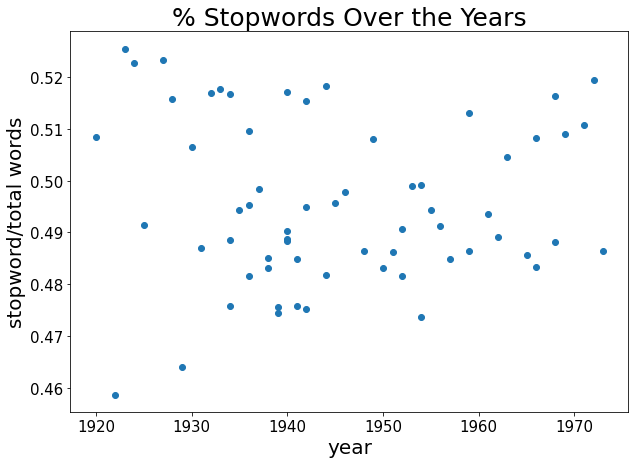

In [29]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_written'], df['%_stop_words'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('year', size = 20)
plt.ylabel('stopword/total words', size = 20)
plt.title('% Stopwords Over the Years', size = 25)

Text(0.5, 1.0, '% Stuff Over the Years')

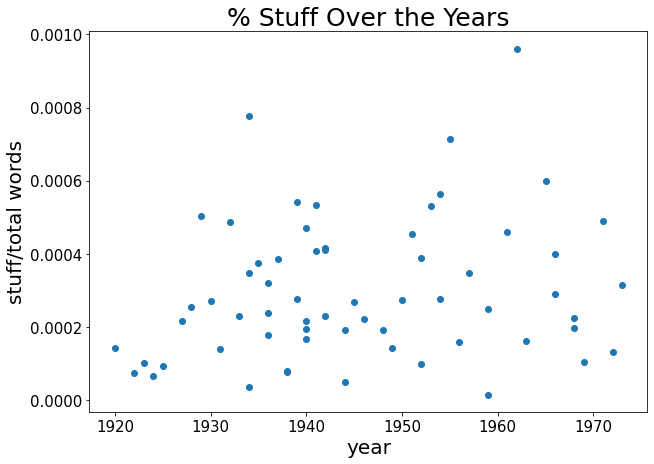

In [30]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_written'], df['%_stuff'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('year', size = 20)
plt.ylabel('stuff/total words', size = 20)
plt.title('% Stuff Over the Years', size = 25)

Text(0.5, 1.0, '% Very Over the Years')

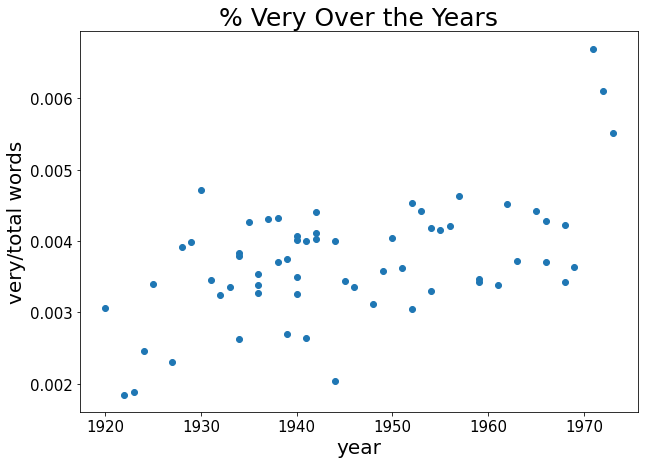

In [31]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_written'], df['%_very'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('year', size = 20)
plt.ylabel('very/total words', size = 20)
plt.title('% Very Over the Years', size = 25)

Text(0.5, 1.0, '% Lot Over the Years')

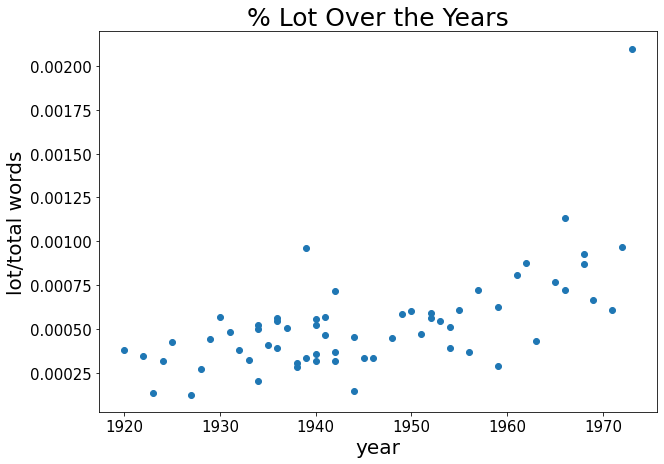

In [32]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_written'], df['%_lot'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('year', size = 20)
plt.ylabel('lot/total words', size = 20)
plt.title('% Lot Over the Years', size = 25)

Text(0.5, 1.0, '% Unique Words Over the Years')

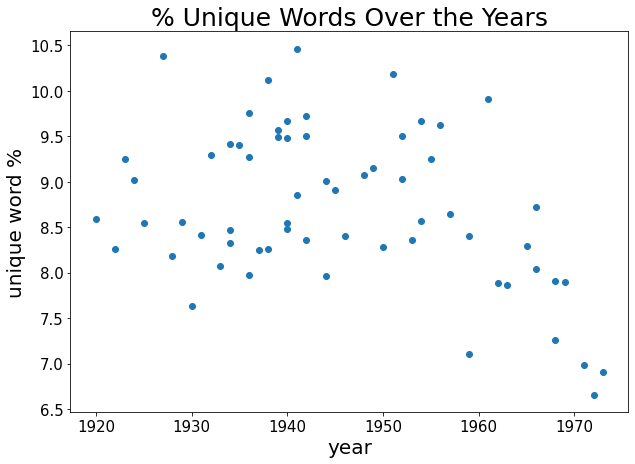

In [11]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_written'], df['unique_words_%'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('year', size = 20)
plt.ylabel('unique word %', size = 20)
plt.title('% Unique Words Over the Years', size = 25)

Text(0, 0.5, 'Sentence Count')

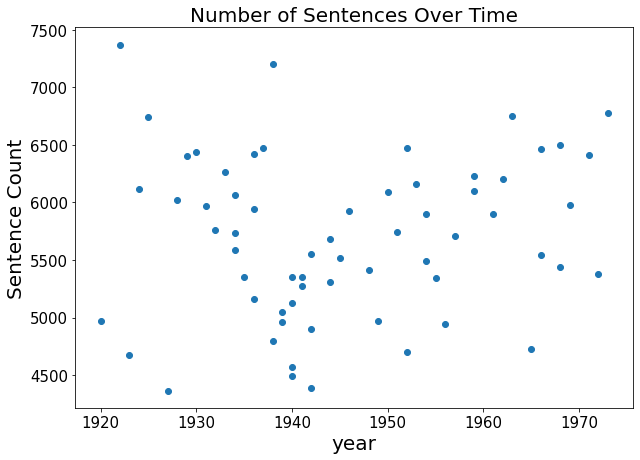

In [12]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_written'], df['sentence_count'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Number of Sentences Over Time', size=20)
plt.xlabel('year', size = 20)
plt.ylabel('Sentence Count', size = 20)

Text(0, 0.5, 'average words per sentence')

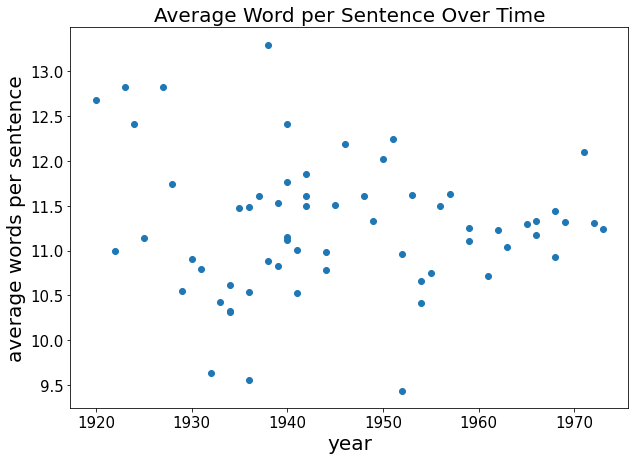

In [13]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_written'], df['avg_words_per_sentence'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Average Word per Sentence Over Time', size=20)
plt.xlabel('year', size = 20)
plt.ylabel('average words per sentence', size = 20)

Text(0, 0.5, 'Flesch Reading Ease Score')

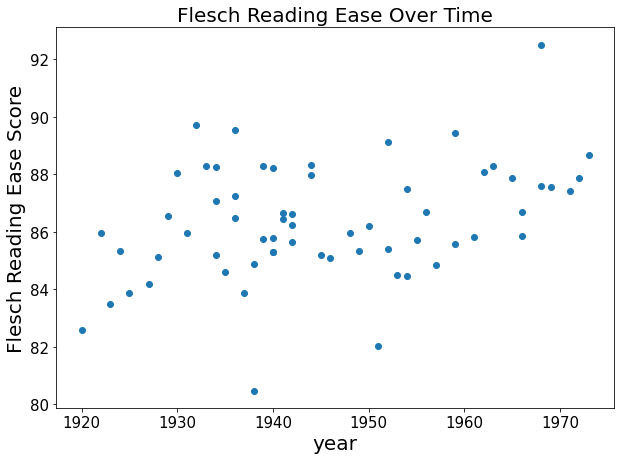

In [14]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_written'], df['flesch_reading_ease'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Flesch Reading Ease Over Time', size=20)
plt.xlabel('year', size = 20)
plt.ylabel('Flesch Reading Ease Score', size = 20)

Text(0, 0.5, 'Adjective Count')

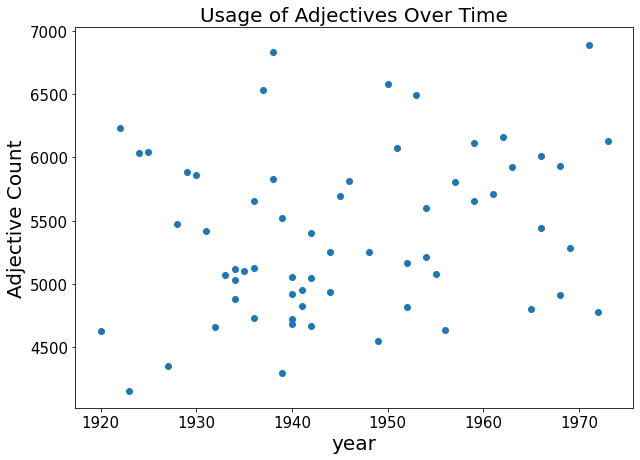

In [15]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_written'], df['total_adj_count'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Usage of Adjectives Over Time', size=20)
plt.xlabel('year', size = 20)
plt.ylabel('Adjective Count', size = 20)

Text(0, 0.5, 'Noun Count')

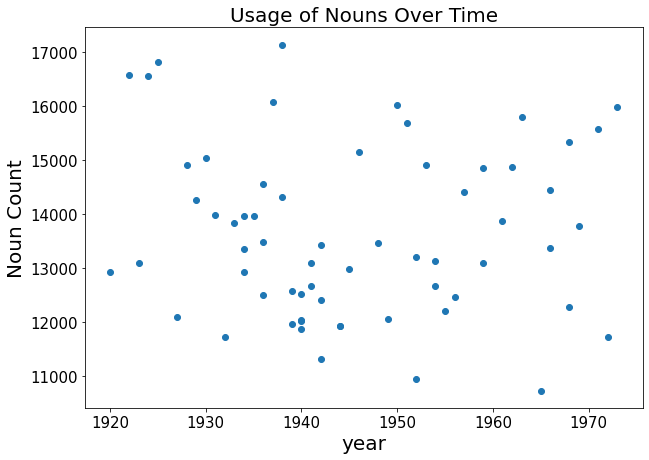

In [16]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_written'], df['total_noun_count'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Usage of Nouns Over Time', size=20)
plt.xlabel('year', size = 20)
plt.ylabel('Noun Count', size = 20)

Text(0, 0.5, 'Unique Adjectives Count')

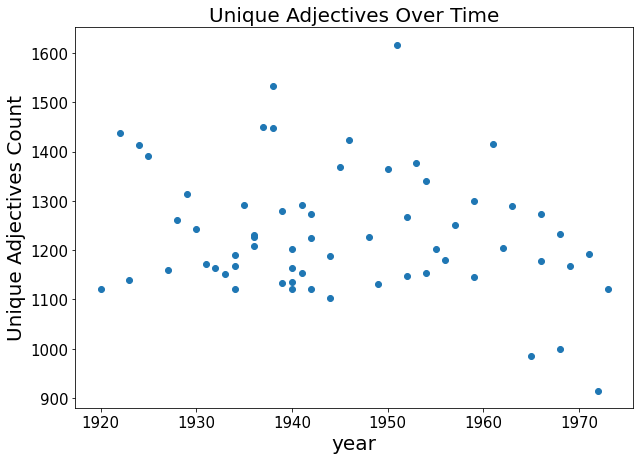

In [17]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_written'], df['unique_adj_count'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Unique Adjectives Over Time', size=20)
plt.xlabel('year', size = 20)
plt.ylabel('Unique Adjectives Count', size = 20)

Text(0, 0.5, 'Unique Nouns Count')

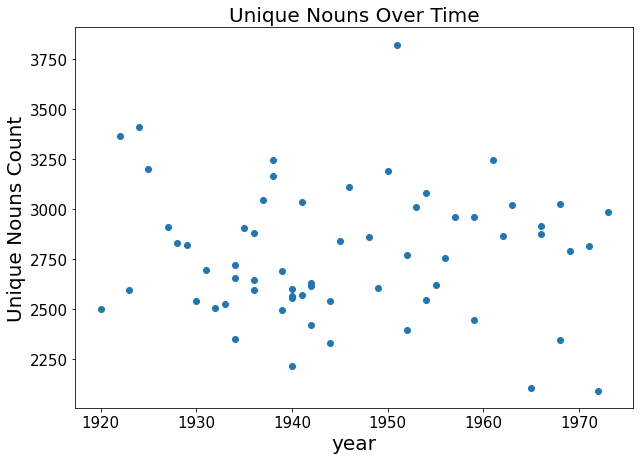

In [18]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_written'], df['unique_noun_count'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Unique Nouns Over Time', size=20)
plt.xlabel('year', size = 20)
plt.ylabel('Unique Nouns Count', size = 20)

Text(0, 0.5, 'Average Syllables per Word')

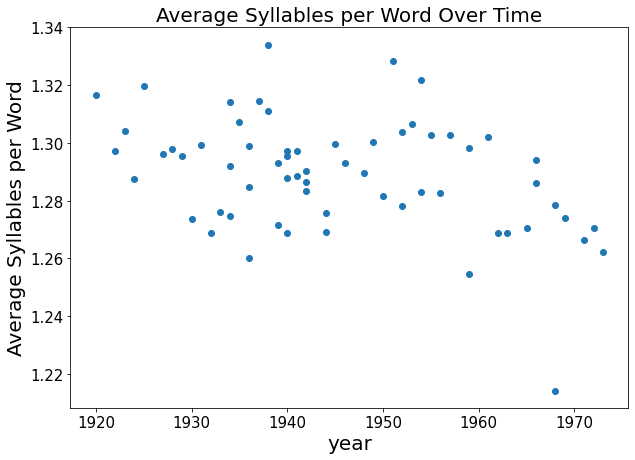

In [19]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_written'], df['avg_syllables_per_word'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Average Syllables per Word Over Time', size=20)
plt.xlabel('year', size = 20)
plt.ylabel('Average Syllables per Word', size = 20)

Text(0, 0.5, '% of Positive Sentences')

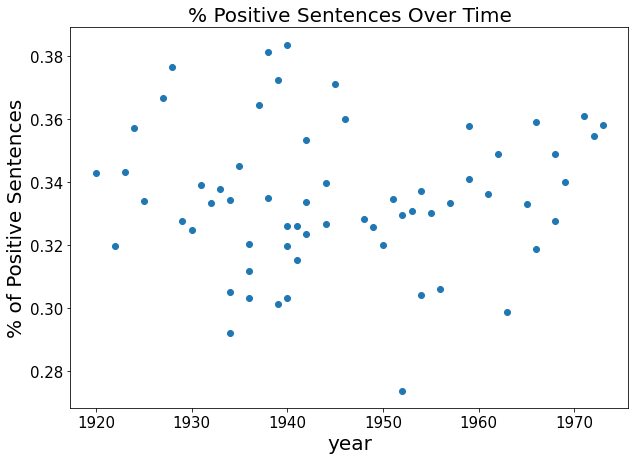

In [20]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_written'], df['%_pos_sentences'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('% Positive Sentences Over Time', size=20)
plt.xlabel('year', size = 20)
plt.ylabel('% of Positive Sentences', size = 20)

Text(0, 0.5, '% of Neutral Sentences')

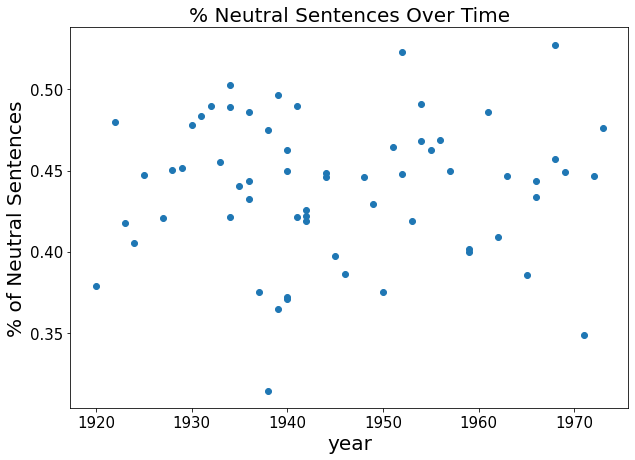

In [21]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_written'], df['%_neu_sentences'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('% Neutral Sentences Over Time', size=20)
plt.xlabel('year', size = 20)
plt.ylabel('% of Neutral Sentences', size = 20)

Text(0, 0.5, '% of Negative Sentences')

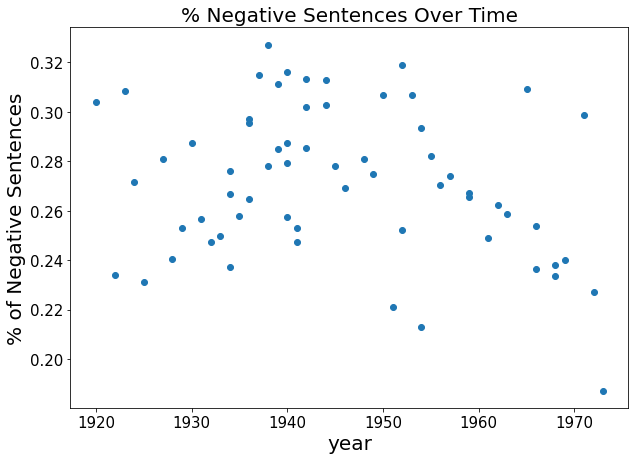

In [22]:
plt.figure(figsize=[10,7])
plt.scatter(df['year_written'], df['%_neg_sentences'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('% Negative Sentences Over Time', size=20)
plt.xlabel('year', size = 20)
plt.ylabel('% of Negative Sentences', size = 20)

### Agatha Christie's Most Positive, Neutral, and Negative Books

In [23]:
df[df['%_pos_sentences'] == max(df['%_pos_sentences'])].reset_index(drop=True)

,book_title,book_text,copyright,year_written,sentence_count,word_count,syllable_count,flesch_reading_ease,avg_words_per_sentence,avg_syllables_per_word,...,only_stopwords,stopwords_count,%_stop_words,stuff_count,%_marchbolt,lot_count,very_count,%_stuff,%_lot,%_very
0,Sad Cypress,elinor katharine carlisle you stand charged up...,© 1940 Agatha,1940,4495,55768,71821,85.289841,12.406674,1.287853,...,you this with the of the of are you or not ver...,27254,0.488703,12,0.004017,20,224,0.000215,0.000359,0.004017


In [24]:
df[df['%_neu_sentences'] == max(df['%_neu_sentences'])].reset_index(drop=True)

,book_title,book_text,copyright,year_written,sentence_count,word_count,syllable_count,flesch_reading_ease,avg_words_per_sentence,avg_syllables_per_word,...,only_stopwords,stopwords_count,%_stop_words,stuff_count,%_marchbolt,lot_count,very_count,%_stuff,%_lot,%_very
0,By the Pricking of My Thumbs,book sunny ridge one aunt ada mr and mrs bere...,© 1968 Agatha,1968,6502,71077,90871,87.579491,10.93156,1.278487,...,and were at the they were an of just them were...,34690,0.488062,14,0.004221,66,300,0.000197,0.000929,0.004221


In [25]:
df[df['%_neg_sentences'] == max(df['%_neg_sentences'])].reset_index(drop=True)

,book_title,book_text,copyright,year_written,sentence_count,word_count,syllable_count,flesch_reading_ease,avg_words_per_sentence,avg_syllables_per_word,...,only_stopwords,stopwords_count,%_stop_words,stuff_count,%_marchbolt,lot_count,very_count,%_stuff,%_lot,%_very
0,Appointment With Death,part i chapter you do see dont you that shes ...,© 1938 Agatha,1938,4795,63760,85061,80.475111,13.297185,1.334081,...,i you do you that to be the out into the to th...,30805,0.48314,5,0.003701,18,236,0.000078,0.000282,0.003701
